In [2]:
# Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
lr = LinearRegression()

# Data

In [3]:
bee = pd.read_csv('./data/vHoneyNeonic_v03.csv')
bee.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bee.shape
#17 Columns, 1132 rows

(1132, 17)

In [5]:
#remove columns that won't be needed 
bee = bee.drop(['StateName'], axis=1) #Don't need state name and abbrev
bee = bee.drop(['FIPS'], axis=1) #this column isn't in the description 

In [6]:
bee.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,Region,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,South,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,South,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,South,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,South,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,South,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [7]:
bee.dtypes
#data types include object, ints, floats

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
Region            object
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
dtype: object

In [8]:
#change objects to category

In [9]:
bee.info()
#see if there are any nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 15 columns):
state            1132 non-null object
numcol           1132 non-null float64
yieldpercol      1132 non-null int64
totalprod        1132 non-null float64
stocks           1132 non-null float64
priceperlb       1132 non-null float64
prodvalue        1132 non-null float64
year             1132 non-null int64
Region           1132 non-null object
nCLOTHIANIDIN    895 non-null float64
nIMIDACLOPRID    895 non-null float64
nTHIAMETHOXAM    895 non-null float64
nACETAMIPRID     895 non-null float64
nTHIACLOPRID     895 non-null float64
nAllNeonic       895 non-null float64
dtypes: float64(11), int64(2), object(2)
memory usage: 132.7+ KB


In [10]:
#the nulls are measurements of pescticide, replace nulls with 0s
bee = bee.fillna(0)

In [11]:
#describe numeric columns
bee.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,62452.296820,61.809187,4.317093e+06,1.202020e+06,1.485928,4.932350e+06,2003.698763,7321.552297,7071.544876,4184.864046,490.096025,80.986661,19149.043905
std,90698.022209,20.701807,6.962385e+06,2.026242e+06,0.966583,8.551674e+06,7.783332,24975.269363,15009.895435,8886.846117,2137.984836,384.930519,43088.637136
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.460000,8.900000e+04,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,47.000000,5.192500e+05,1.280000e+05,0.750000,8.137500e+05,1997.000000,0.000000,44.475000,0.000000,0.000000,0.000000,59.525000
50%,27000.000000,60.000000,1.607500e+06,4.110000e+05,1.260000,1.936000e+06,2003.000000,0.000000,1717.300000,33.350000,0.000000,0.000000,2350.850000
75%,69250.000000,74.000000,4.325000e+06,1.377000e+06,1.920000,4.842500e+06,2010.000000,1754.325000,6572.125000,3760.900000,75.650000,0.000000,18052.150000
max,520000.000000,177.000000,4.641000e+07,1.380000e+07,7.860000,8.385900e+07,2017.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [12]:
#describe all columns 
bee.describe(include='all')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,Region,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,1132,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1132.000000,1132,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,62452.296820,61.809187,4.317093e+06,1.202020e+06,1.485928,4.932350e+06,2003.698763,NaN,7321.552297,7071.544876,4184.864046,490.096025,80.986661,19149.043905
std,NaN,90698.022209,20.701807,6.962385e+06,2.026242e+06,0.966583,8.551674e+06,7.783332,NaN,24975.269363,15009.895435,8886.846117,2137.984836,384.930519,43088.637136
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.460000,8.900000e+04,1991.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,10000.000000,47.000000,5.192500e+05,1.280000e+05,0.750000,8.137500e+05,1997.000000,NaN,0.000000,44.475000,0.000000,0.000000,0.000000,59.525000
50%,NaN,27000.000000,60.000000,1.607500e+06,4.110000e+05,1.260000,1.936000e+06,2003.000000,NaN,0.000000,1717.300000,33.350000,0.000000,0.000000,2350.850000
75%,NaN,69250.000000,74.000000,4.325000e+06,1.377000e+06,1.920000,4.842500e+06,2010.000000,NaN,1754.325000,6572.125000,3760.900000,75.650000,0.000000,18052.150000


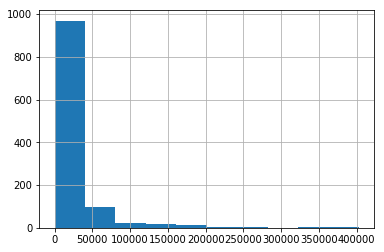

In [13]:
#total pesticides hist: right skewed 
bee.nAllNeonic.hist()

In [14]:
bee.Region.value_counts()
#significantly more Southern representation than Northeast

South        363
Midwest      324
West         310
Northeast    135
Name: Region, dtype: int64

In [15]:
bee.state.value_counts()
#44 states present, majority have 27 rows. 5 have less than 27 rows 

OH    27
IL    27
ND    27
MO    27
VA    27
AZ    27
WY    27
MS    27
KS    27
CO    27
OR    27
UT    27
CA    27
IN    27
NJ    27
WA    27
SD    27
MI    27
TX    27
NY    27
VT    27
AR    27
ID    27
AL    27
GA    27
TN    27
KY    27
LA    27
NC    27
WV    27
PA    27
FL    27
HI    27
NE    27
WI    27
MT    27
ME    27
MN    27
IA    27
NM    22
NV    18
MD    13
OK    13
SC    13
Name: state, dtype: int64

In [16]:
tst = bee.groupby(['year','Region'])['nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID'].sum()

In [19]:
tst =tst.reset_index()

In [20]:
tst.set_index('year')

,Region,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID
year,,,,,,
1991,Midwest,0.0,0.0,0.0,0.0,0.0
1991,Northeast,0.0,0.0,0.0,0.0,0.0
1991,South,0.0,0.0,0.0,0.0,0.0
1991,West,0.0,0.0,0.0,0.0,0.0
1992,Midwest,0.0,0.0,0.0,0.0,0.0
1992,Northeast,0.0,0.0,0.0,0.0,0.0
1992,South,0.0,0.0,0.0,0.0,0.0
1992,West,0.0,0.0,0.0,0.0,0.0
1993,Midwest,0.0,0.0,0.0,0.0,0.0


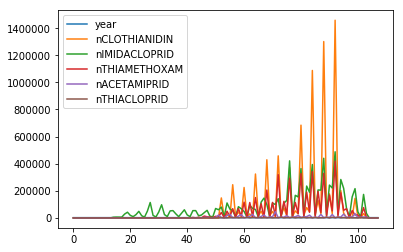

In [21]:
tst.plot(kind='line')

In [23]:
pest = bee.groupby('year')['nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID'].sum()
pest

,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID
year,,,,,
1991,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.0,0.0
1993,0.0,0.0,0.0,0.0,0.0
1994,0.0,11207.2,0.0,0.0,0.0
1995,0.0,82134.0,0.0,0.0,0.0
1996,0.0,101002.5,0.0,0.0,0.0
1997,0.0,185898.7,0.0,0.0,0.0
1998,0.0,166324.4,0.0,0.0,0.0
1999,0.0,140227.8,0.0,0.0,0.0


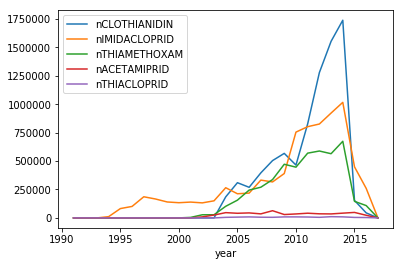

In [26]:
#nIMIDACLOPRID usage starts rampign up earlier than 2003
#nCLOTHIANIDIN usage surges around 2013
pest.plot(kind='line');

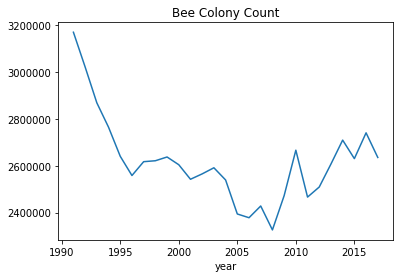

In [121]:
bee.groupby(['year'])['numcol'].sum().plot(kind='line');
plt.title('Bee Colony Count');

Bee colonies were declining rapidly between 1990 and 1995 

# Model Exploration: 

Neonic use in the USA began around 2003 = 

In [122]:
bee.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
numcol,1.000000,0.241379,0.952677,0.809360,-0.187786,0.873836,0.004369,0.020764,0.360655,0.082446,0.286041,-0.028467,0.168612
yieldpercol,0.241379,1.000000,0.396507,0.352407,-0.337930,0.239500,-0.215072,-0.053849,-0.088192,-0.008366,-0.104936,-0.095385,-0.069719
totalprod,0.952677,0.396507,1.000000,0.851490,-0.220494,0.853131,-0.060457,0.001124,0.234814,0.057206,0.145510,-0.050082,0.101020
stocks,0.809360,0.352407,0.851490,1.000000,-0.224134,0.711388,-0.046603,0.012568,0.167130,0.045831,0.117558,-0.009889,0.080702
priceperlb,-0.187786,-0.337930,-0.220494,-0.224134,1.000000,-0.003350,0.764124,0.241838,0.201218,0.252317,0.053978,0.109371,0.265964
prodvalue,0.873836,0.239500,0.853131,0.711388,-0.003350,1.000000,0.215962,0.107994,0.343346,0.214183,0.211474,0.001056,0.236877
year,0.004369,-0.215072,-0.060457,-0.046603,0.764124,0.215962,1.000000,0.280871,0.336769,0.416429,0.164397,0.168007,0.375658
nCLOTHIANIDIN,0.020764,-0.053849,0.001124,0.012568,0.241838,0.107994,0.280871,1.000000,0.525981,0.756266,0.036553,0.007472,0.920708
nIMIDACLOPRID,0.360655,-0.088192,0.234814,0.167130,0.201218,0.343346,0.336769,0.525981,1.000000,0.562003,0.551665,0.008663,0.796582
nTHIAMETHOXAM,0.082446,-0.008366,0.057206,0.045831,0.252317,0.214183,0.416429,0.756266,0.562003,1.000000,0.099203,0.027570,0.845539


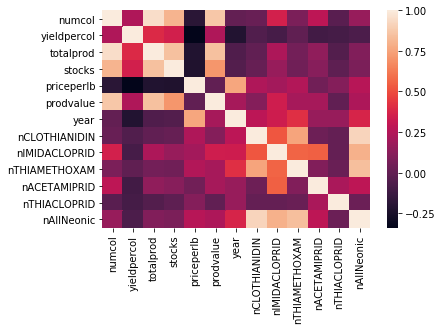

In [27]:
sns.heatmap(bee.corr());

# Liner Regression

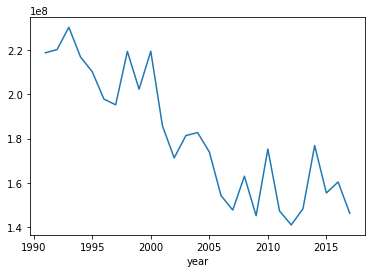

In [124]:
#total production by year appears to be declinng unevenly 
bee.groupby(['year'])['totalprod'].sum().plot();

The data doesn't have a clear linear relationship 

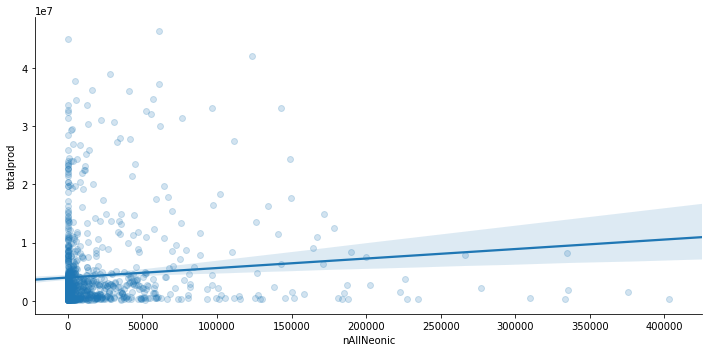

In [30]:
sns.lmplot(x='nAllNeonic', y='totalprod', data=bee, aspect=2, scatter_kws={'alpha':0.2});

In [32]:
features = ['nAllNeonic']
X = bee[features]
y = bee.totalprod

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [34]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)

3990449.851019065
[18.41622785]


In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4415247.0409546485
MSE: 51169151599463.76
RMSE: 7153261.605691753


Sure enough, the fit statistics are pretty terrible - Linear regression doesn't fit these well 

In [151]:
# Import function to create training and test set splits
from sklearn.cross_validation import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

/Users/x3b2/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [166]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=1e5
# Min and max degree of polynomials features to consider
degree_min = 1
degree_max = 4
# Test/train split

# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
    print(degree,'test score',test_score)
    print(degree, 'RMSE',RMSE)

1 test score 0.0032030940197271818
1 RMSE 120302354.38674068
2 test score 0.020180636345606295
2 RMSE 119273453.75847621
3 test score 0.025913341448940752
3 RMSE 118924020.67407246
4 test score 0.02079159006287079
4 RMSE 119236262.24871159


In [160]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('lassocv', LassoCV(alphas=None, copy_X=True, cv=5, eps=0.0001, fit_intercept=True,
    max_iter=100000.0, n_alphas=20, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

In [161]:
test_pred = np.array(model.predict(X_test))
RMSE = np.sqrt(np.sum(np.square(test_pred-y_test)))
test_score = model.score(X_test,y_test)

In [162]:
test_score

0.02079159006287079

In [92]:
features = ['nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID']
X = bee[features]
y = bee.totalprod

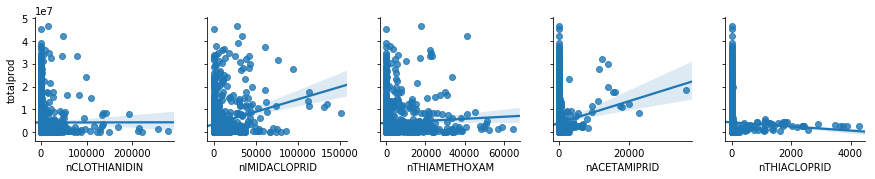

In [93]:
sns.pairplot(bee, x_vars=features, y_vars='totalprod', kind='reg');

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [67]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_)
list(zip(features, lr.coef_))

3684678.9176331675


[('nCLOTHIANIDIN', -50.07612107486819),
 ('nIMIDACLOPRID', 168.35480353959903),
 ('nTHIAMETHOXAM', -11.197745680780955),
 ('nACETAMIPRID', -175.2864548435357),
 ('nTHIACLOPRID', -606.2624368337259)]

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4262116.136449341
MSE: 48586595638834.32
RMSE: 6970408.570437914


In [ ]:
https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49